In [1]:
import pandas as pd
import wave
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

In [27]:
# df = pd.read_csv("./スコープコーダデータ/TEST0000.CSV", skiprows=16, encoding="cp932", names=["top", "bottom", "left", "right", "d"])
df = pd.read_csv("./スコープコーダデータ/TEST0002.CSV", skiprows=16, encoding="cp932", names=["top", "bottom", "left", "right", "d"])
# df = pd.read_csv("./スコープコーダデータ/old_data/TEST0000.CSV", skiprows=16, encoding="cp932", names=["top", "bottom", "left", "right", "d"])
df = df.drop(labels="d", axis=1)
# df = df.iloc[95000:, :]
df = df.iloc[95000:, :]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 973000 entries, nan to nan
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   top     973000 non-null  float64
 1   bottom  973000 non-null  float64
 2   left    973000 non-null  float64
 3   right   973000 non-null  float64
dtypes: float64(4)
memory usage: 37.1 MB


In [29]:
def show(labels):
    t, b, l, r  = labels
    fig = plt.figure(figsize=(20, 4))

    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    ax1.plot(range(len(t)), t)
    ax2.plot(range(len(t)), b)
    ax3.plot(range(len(t)), l)
    ax4.plot(range(len(t)), r)

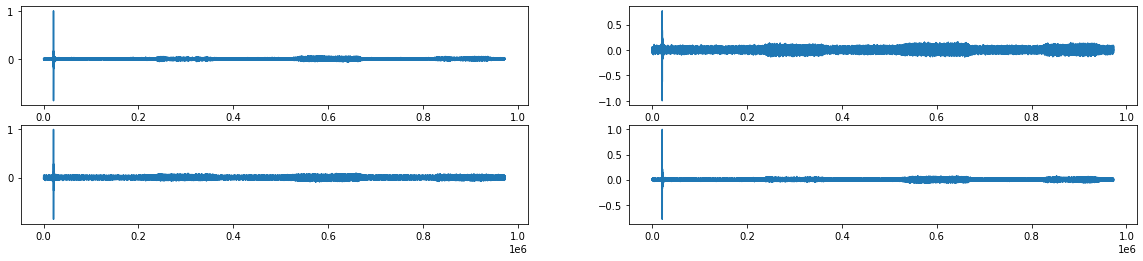

In [30]:
# 波形データを正規化する
r_normalized_data = df["right"]
b_normalized_data = df["bottom"]
l_normalized_data = df["left"]
t_normalized_data = df["top"]

r_normalized_data = np.array(df["right"]) / np.max(np.abs(df["right"]))
b_normalized_data = np.array(df["bottom"]) / np.max(np.abs(df["bottom"]))
l_normalized_data = np.array(df["left"]) / np.max(np.abs(df["left"]))
t_normalized_data = np.array(df["top"]) / np.max(np.abs(df["top"]))

labels = [t_normalized_data, b_normalized_data, l_normalized_data, r_normalized_data]
show(labels)

In [20]:
# ダウンサンプリング
original_sample_rate = 100000
target_sample_rate = 44100
num_samples = int(len(r_normalized_data) * (target_sample_rate / original_sample_rate))

r_resampled_data = resample(r_normalized_data, num_samples)
b_resampled_data = resample(b_normalized_data, num_samples)
l_resampled_data = resample(l_normalized_data, num_samples)
t_resampled_data = resample(t_normalized_data, num_samples)

In [21]:
len(r_resampled_data)

441441

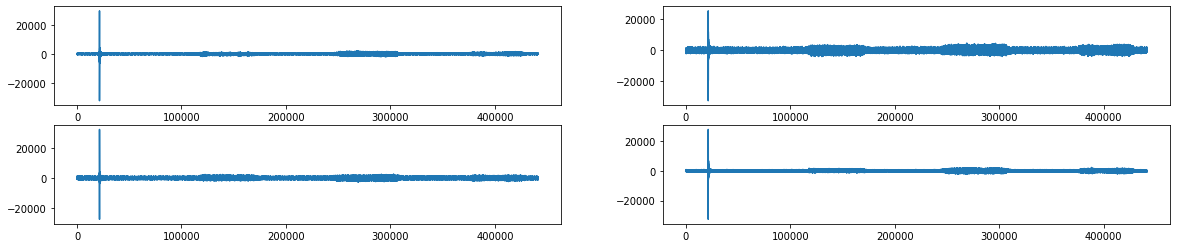

In [22]:
# 正規化されたデータを16ビット整数にスケーリング
r_scaled_data = (r_resampled_data * 32767).astype(np.int16)
b_scaled_data = (b_resampled_data * 32767).astype(np.int16)
l_scaled_data = (l_resampled_data * 32767).astype(np.int16)
t_scaled_data = (t_resampled_data * 32767).astype(np.int16)

labels = [t_scaled_data, b_scaled_data, l_scaled_data, r_scaled_data]
show(labels)

In [9]:
# 音声ファイルを作成する
def create_voiceFile(ch_data, fileName, sample_rate=44100):
    with wave.open(fileName, "w") as wf:
        wf.setnchannels(1)  # モノラル
        wf.setsampwidth(2)  # 16ビット
        wf.setframerate(sample_rate)  # サンプリングレート：44.1kHz
        wf.writeframes(ch_data.tobytes())

create_voiceFile(r_scaled_data, "./スコープコーダデータ/r_output.wav")
create_voiceFile(b_scaled_data, "./スコープコーダデータ/b_output.wav")
create_voiceFile(l_scaled_data, "./スコープコーダデータ/l_output.wav")
create_voiceFile(t_scaled_data, "./スコープコーダデータ/t_output.wav")
